# Asymp app version of fig 3

Asymp

In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [64]:
import pandas as pd

import seaborn as sns

from math import log, floor

from tqdm import tqdm

import itertools

import numpy as np
import matplotlib.pyplot as plt

from plots2.fns import (
    get_corner_annotations,
    get_corner_annotations_custom_labels,
    get_dose_colors
)

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE
)

from poly2.utils import trait_vec, gamma_dist, get_dist_mean, get_best_dose_for_cb, Fungicide, FungicideAsymptote
from poly2.config import Config,  get_asymptote_config
from poly2.simulator import SimulatorOneTrait, SimulatorAsymptote
from poly2.consts import FUNG_DECAY_RATE, MUTATION_PROP, MUTATION_SCALE

In [4]:
plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize

# Get data

In [5]:
xx = np.linspace(0, 1, 101)

In [39]:
f1s = np.array([FungicideAsymptote(3, x, 10).effect(1, 1456+1e-5) for x in xx])
f1r = np.array([FungicideAsymptote(3, x, 10).effect(0.6, 1456+1e-5) for x in xx])

In [38]:
f2s = np.array([Fungicide(3, x).effect(1e-3, 1456+1e-5) for x in xx])
f2r = np.array([Fungicide(3, x).effect(0.2, 1456+1e-5) for x in xx])

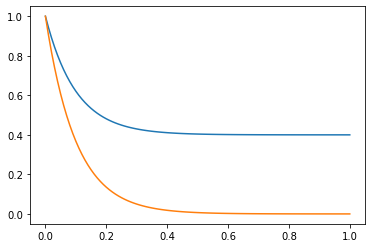

In [40]:
f, ax = plt.subplots()

ax.plot(xx, f1r)
ax.plot(xx, f1s)

# Plot

In [76]:
np.where(f2r - f2s == np.amax(f2r - f2s))

(array([27], dtype=int64),)

In [77]:
xx[27]

0.27

In [78]:
(f2r - f2s)[27]

0.4926754812177949

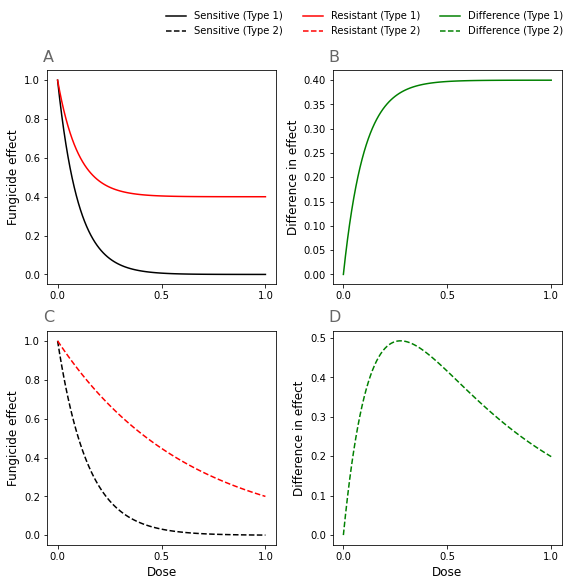

In [73]:
f, ax = plt.subplots(2, 2, figsize=(8,8))

ax[0][0].plot(xx, f1s, c='k', label='Sensitive (Type 1)')
ax[0][0].plot(xx, f1r, c='r', label='Resistant (Type 1)')

ax[0][1].plot(xx, f1r - f1s, c='g', label='Difference (Type 1)')


ax[1][0].plot(xx, f2s, c='k', ls='--', label='Sensitive (Type 2)')
ax[1][0].plot(xx, f2r, c='r', ls='--', label='Resistant (Type 2)')

ax[1][1].plot(xx, f2r - f2s, c='g', ls='--', label='Difference (Type 2)')


ax[0][0].set_ylabel('Fungicide effect')
ax[1][0].set_ylabel('Fungicide effect')

ax[0][1].set_ylabel('Difference in effect')
ax[1][1].set_ylabel('Difference in effect')

ax[1][0].set_xlabel('Dose')
ax[1][1].set_xlabel('Dose')

for ii, jj in itertools.product(range(2), range(2)):
    ax[ii][jj].set_xticks([0, 0.5, 1])

    
    
plt.tight_layout(rect=[0,0,1,0.92], h_pad=3)

ha, la, = ax[0][0].get_legend_handles_labels()
hb, lb, = ax[0][1].get_legend_handles_labels()
hc, lc, = ax[1][0].get_legend_handles_labels()
hd, ld, = ax[1][1].get_legend_handles_labels()

f.legend(
    handles=[ha[0], hc[0], ha[1], hc[1], hb[0], hd[0]],
    labels= [la[0], lc[0], la[1], lc[1], lb[0], ld[0]],
    loc=1,
    bbox_to_anchor=(1, 1.02),
    frameon=False,
    ncol=3,
)

get_corner_annotations(2, 2, 0.075, 0.91, 0.495, 0.452, plt)

In [79]:
f.savefig('../figures/paper/thesis_fig0.jpg', dpi=600, bbox_inches="tight")